In [1]:
import Pkg
Pkg.activate("..")

using MolecularGraph
using MolecularGraph.Graph
using MolecularGraph.Geometry

┌ Info: Recompiling stale cache file /Users/smatsuoka/.julia/compiled/v1.0/MolecularGraph/6vz1i.ji for MolecularGraph [6c89ec66-9cd8-5372-9f91-fabc50dd27fd]
└ @ Base loading.jl:1187


loading: funcgroup.yaml
loading: ring.yaml
loading: biomolecule.yaml


In [2]:
using LinearAlgebra

function Geometry.graphdistembedding(graph::UDGraph; yzfactor=2.0, force3d=false)
    n = nodecount(graph)
    D = distancematrix(graph)
    H = LinearAlgebra.I - fill(1 / n, (n, n))
    G = - 0.5 * H * D * H # Gram matrix
    F = LinearAlgebra.eigen(G)
    display(F)
    od = sortperm(real.(F.values), rev=true)
    xidx = od[1]
    yidx = od[2]
    zidx = od[3]
    coords = zeros(n, 3)
    xv = abs(F.values[xidx])
    yv = abs(F.values[yidx])
    zv = abs(F.values[zidx])
    println([xv, yv, zv])
    coords[:, 1] = real.(F.vectors[:, xidx]) * sqrt(xv)
    coords[:, 2] = real.(F.vectors[:, yidx]) * sqrt(yv)
    coords[:, 3] = real.(F.vectors[:, zidx]) * sqrt(zv)
    if !force3d && yv / zv > yzfactor
        return Cartesian2D(coords[:, 1:2])
    else
        return Cartesian3D(coords)
    end
end

In [23]:
# mol = smilestomol("C1CCC2CCC3CCCCC1C23")
mol = smilestomol("C12CCCC(CC1)CC2")
# mol = smilestomol("C12C3C1C23")
coords = graphdistembedding(mol)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
9-element Array{Complex{Float64},1}:
     2.8228756555322985 + 0.0im                   
     2.6902380714238117 + 0.0im                   
     0.4999999999999998 + 0.0im                   
   -0.16666666666666607 + 0.0im                   
     0.3097619285761917 + 0.0im                   
     0.1771243444677048 + 0.0im                   
                    2.0 + 0.0im                   
 1.0424741958028662e-16 + 1.0382329397893297e-16im
 1.0424741958028662e-16 - 1.0382329397893297e-16im
eigenvectors:
9×9 Array{Complex{Float64},2}:
     0.479229+0.0im   0.105283+0.0im  …   0.191356-0.107684im   
     0.394346+0.0im  -0.380508+0.0im      0.191356-0.107684im   
 -2.02616e-15+0.0im  -0.598519+0.0im      0.191356-0.107684im   
    -0.394346+0.0im  -0.380508+0.0im      0.191356-0.107684im   
    -0.479229+0.0im   0.105283+0.0im      0.191356-0.107684im   
    -0.239615+0.0im   0.2872

[2.82288, 2.69024, 2.0]


Cartesian3D([0.805173 0.172685 -5.06259e-17; 0.662557 -0.624107 7.84969e-17; … ; -0.402587 0.471133 0.707107; 0.402587 0.471133 0.707107])

In [32]:
constraint = Geometry.ForceConstraints(mol[:RingSize])
opt =  forcedirected(mol, coords, constraint)
# mol.coords[:Cartesian2D] = opt


23.958307976013486
23.93972840655466
23.90261888338679
23.847078279112488
23.77325401039009
23.681340981117792
23.571580196144783
23.444257064397743
23.299699414241296
23.138275247331293
22.96039026010727
22.76648516436059
22.55703283997819
22.332535353989897
22.093520880445876
21.840540555443766
21.574165300849693
21.294982648963774
21.00359359862864
20.700609531136465
20.386649211828065
20.062335900571256
19.728294591429428
19.385149398857255
19.033521104756744
18.674024877756327
18.30726817319412
17.93384881954228
17.554353294443832
17.169355191178433
16.779413874255102
16.385073320965443
15.98686114413198
15.585287789958642
15.180845903835456
14.774009856164904
14.365235419759465
13.954959590103
13.543600539769637
13.1315576985517
12.719211951366129
12.30692594679945
11.895044510236438
11.483895156935613
11.073788702225709
10.665019968291414
10.257868589927533
9.852599925363485
9.449466083078262
9.04870708185602
8.650552169784605
8.255221339385862
7.862927091963155
7.47387652667749

Cartesian3D([1.49133 0.378918 -1.55314e-16; 1.36124 -1.19919 1.90428e-16; … ; -0.77703 0.887925 1.32631; 0.77703 0.887925 1.32631])

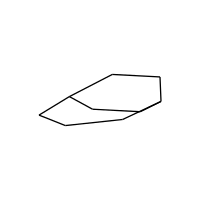

In [52]:
rot = Geometry.rotation(point(0.0, 0.0, 1.0), pi / 4)
opt = cartesian3d(rawdata(opt) * rot)
mol.coords[:Cartesian2D] = cartesian2d(opt)

# mol.coords[:Cartesian2D] = coords
mol_svg = drawsvg!(mol, 200, 200)
display("image/svg+xml",  mol_svg)